In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv("import_data/TB_SSC_ONLINE/TB_SSC_ONLINE.csv")

In [ ]:
df

In [6]:
df.isnull().sum()

기준년월      0
평일휴일구분    0
요일구분      0
시간대구분     0
성별        0
직업        0
연령대       0
대분류명      0
중분류명      0
소분류명      0
매출건수      0
매출금액합     0
dtype: int64

In [8]:
df['직업'].value_counts()

직업
C.회사원(일반)     246078
J.기타          160863
F.자영업자        144311
B.회사원(대기업)    127216
D.공무원          64034
E.교육인          57893
A.전문직          44955
Name: count, dtype: int64

In [9]:
df['기준년월'].value_counts()

기준년월
202206    74987
202208    74486
202210    73307
202209    73115
202205    72514
202203    71252
202212    70648
202207    70280
202211    68155
202204    66358
202202    66103
202201    64145
Name: count, dtype: int64

In [10]:
df['매출건수'].value_counts()

매출건수
15       25884
16       23835
17       22178
18       20849
19       19253
         ...  
31187        1
6112         1
10963        1
9724         1
12928        1
Name: count, Length: 14607, dtype: int64

In [11]:
df['대분류명'].value_counts()

대분류명
쇼핑     300097
생활     145941
여가      98637
요식      81679
교육      59142
여행      55855
자동차     54781
인터넷     39551
건강       9667
Name: count, dtype: int64

In [12]:
df['요일구분'].value_counts()

요일구분
월    134493
수    128612
화    126632
목    122113
금    121003
토    106585
일    105912
Name: count, dtype: int64

In [13]:
df['평일휴일구분'].value_counts()

평일휴일구분
평일    586187
휴일    259163
Name: count, dtype: int64

In [ ]:
# 대분류가 쇼핑인 것만 필터링
df2 = df[df['대분류명']=='쇼핑']
df2.head(50)

In [16]:
df2_ratio = df2['중분류명'].value_counts(normalize=True)*100
print(df2_ratio)

중분류명
식료품       21.628673
패션        20.880582
종합몰       12.385995
가전        10.590242
화장품        7.892781
홈쇼핑        7.371617
유아용품       4.882421
도매         4.831771
할인점/마트     3.245617
편의점        2.831751
상품권        1.914714
중고용품       1.174953
면세점        0.368881
Name: proportion, dtype: float64


In [ ]:
df_new=df.copy()
df_new['1건매출금액']=df_new['매출금액합']/df_new['매출건수']
df_new.head(30)

In [ ]:
print(df_new)

In [21]:
df['연령대'].value_counts()

연령대
40    240816
30    224562
50    169723
20    127665
60     82584
Name: count, dtype: int64

In [22]:
df['소분류명'].value_counts()

소분류명
종합몰       26571
음식배달      24543
정보서비스     24055
의류        23778
종합식품      23275
          ...  
오토바이         16
국/찌개/탕       11
여객선           8
면류            2
중고의류          2
Name: count, Length: 123, dtype: int64

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("import_data/TB_SSC_ONLINE/TB_SSC_ONLINE.csv")

In [3]:
df['log_매출건수']=np.log1p(df['매출건수'])
df['log_매출금액합']=np.log1p(df['매출금액합'])

from scipy.stats import skew
skew_매출건수 = skew(df['log_매출건수'])
skew_매출금액합 = skew(df['log_매출금액합'])

In [4]:
#사용할 컬럼 선택
numeric_columns = ['log_매출건수', 'log_매출금액합']
categorical_columns = ['성별', '직업', '연령대']
#범주형 데이터 원핫
encoder = OneHotEncoder(sparse_output=False, drop='first') #첫번째 카테고리 제거로 다중공선성 방지
encoded_categorical = encoder.fit_transform(df[categorical_columns])
#변환된 원핫 인코딩된 컬럼명 생성
encoded_columns = encoder.get_feature_names_out(categorical_columns)
#데이터프레임 변환
df_encoded = pd.DataFrame(encoded_categorical, columns=encoded_columns)
#수치형 데이터 스케일링
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df[numeric_columns])
#수치형 데이터프레임 변환
df_numeric = pd.DataFrame(df_numeric_scaled, columns=numeric_columns)
#수치형+원핫 인코딩 데이터 합치기
df_final = pd.concat([df_numeric, df_encoded], axis=1)

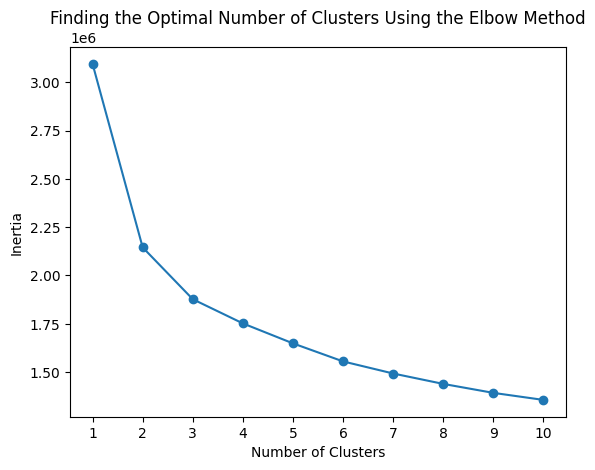

In [5]:
#적절한 클러스터 수 찾기(엘보우 방법)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final)
    inertia.append(kmeans.inertia_)
#엘보우 그래프 출력
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Finding the Optimal Number of Clusters Using the Elbow Method')
plt.xticks(range(1, 11)) #x축을 1단위로 설정
plt.show()

         log_매출건수  log_매출금액합
Cluster                     
0        7.045467  17.902904
1        3.381638  13.734940
2        4.534394  15.803720


/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


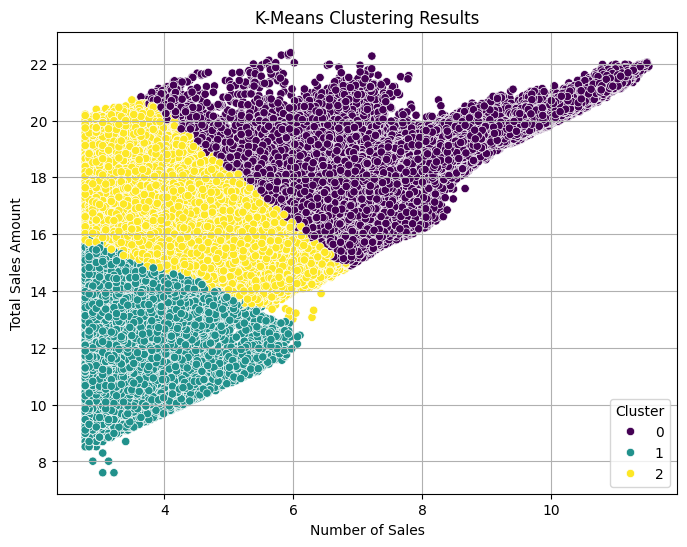

In [6]:
#최적 클러스터 개수 설정
optimal_k=3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_final['Cluster']=kmeans.fit_predict(df_final)

df['Cluster']=df_final['Cluster']

cluster_summary = df.groupby('Cluster')[['log_매출건수', 'log_매출금액합']].mean()

print(cluster_summary)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['log_매출건수'], y=df['log_매출금액합'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Number of Sales')
plt.ylabel('Total Sales Amount')
plt.title('K-Means Clustering Results')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [7]:
cluster_summary = df.groupby('Cluster').agg({
    '매출건수': ['mean', 'median', 'max', 'min'], 
    '매출금액합': ['mean', 'median', 'max', 'min']
})
print(cluster_summary)

                매출건수                            매출금액합                          \
                mean median     max min          mean      median         max   
Cluster                                                                         
0        2930.168456  882.0  100952  37  1.336480e+08  51665000.0  5274505000   
1          32.630910   26.0     448  15  1.354481e+06   1071000.0     7854000   
2         121.889246   91.0     938  15  1.150886e+07   6788000.0  1002098000   

                  
             min  
Cluster           
0        2925000  
1           2000  
2         447000  


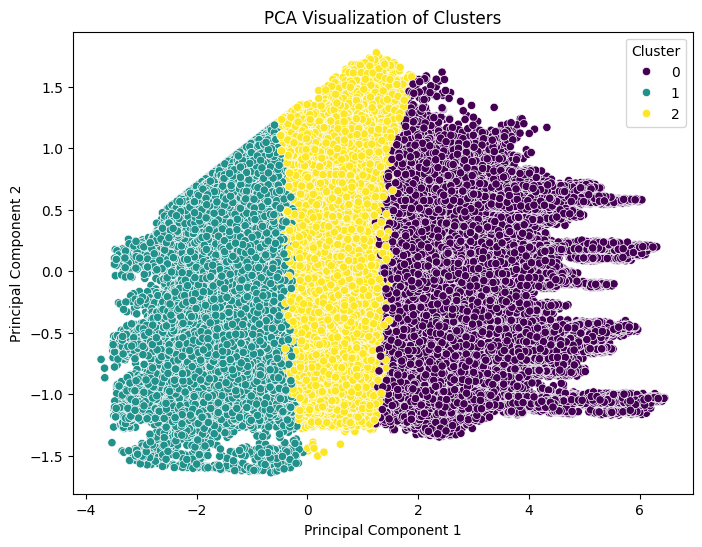

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_final.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_final['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features = ['log_매출건수', 'log_매출금액합']

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[features])
silhouette_scores={} 

for k in range(2, 8):
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels=kmeans.fit_predict(df_scaled)

    score=silhouette_score(df_scaled, cluster_labels)
    silhouette_scores[k]=score
    print(f"클러스터 개수:{k}, 실루엣 점수: {score:.4f}")

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

features = ['log_매출건수', 'log_매출금액합']

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[features])

df_sampled, _ = train_test_split(df_scaled, test_size=0.5, random_state=42)

pca = PCA(n_components=0.95, random_state=42)
df_pca = pca.fit_transform(df_sampled)

silhouette_scores = {}

for k in range(2, 8):
    kmeans=MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100, n_init=5)
    cluster_labels=kmeans.fit_predict(df_pca)
    score=silhouette_score(df_pca, cluster_labels)
    silhouette_scores[k]=score
    print(f"클러스터 개수:{k}, 실루엣 점수: {score:.4f}")

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

features = ['log_매출건수', 'log_매출금액합']
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[features])

df_sampled, _, idx_sampled, _ = train_test_split(df_scaled, range(len(df_scaled)), test_size=0.5, random_state=42)

svd = TruncatedSVD(n_components=2, random_state=42)
df_reduced = svd.fit_transform(df_sampled)

silhouette_scores = {}

for k in range(2, 8):
    kmeans=MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256, n_init=3)
    cluster_labels=kmeans.fit_predict(df_reduced)

    full_labels = kmeans.predict(df_scaled)
    score = silhouette_score(df_scaled, full_labels)
    silhouette_scores[k] = score
    print(f"클러스터 개수:{k}, 실루엣 점수: {score:.4f}")

/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


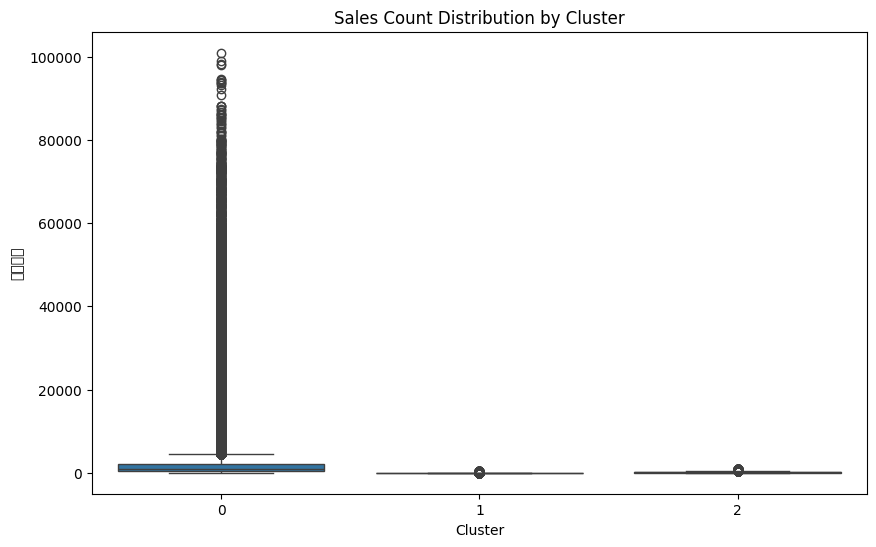

/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing fr

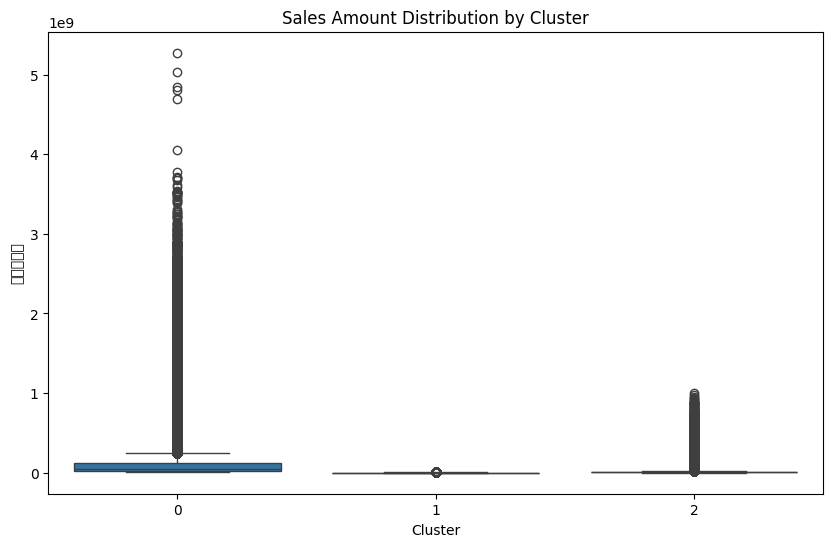

/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


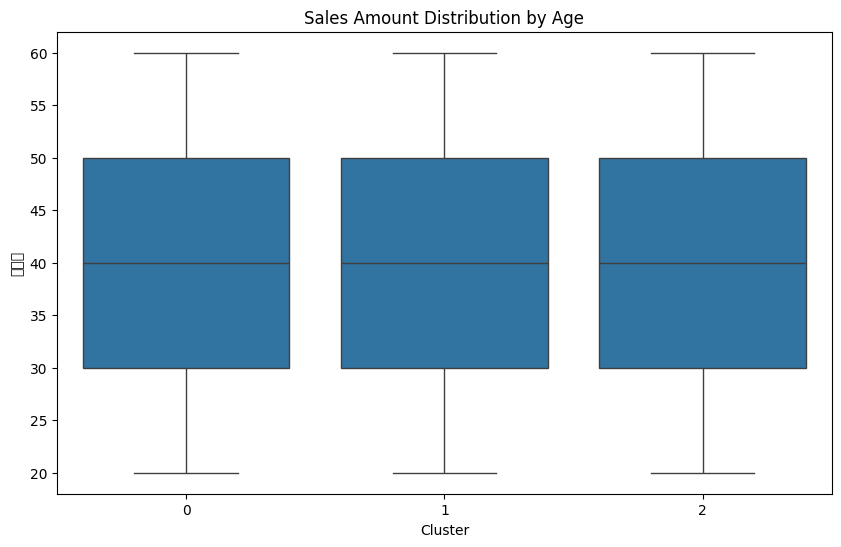

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='매출건수', data=df)
plt.title('Sales Count Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='매출금액합', data=df)
plt.title('Sales Amount Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='연령대', data=df)
plt.title('Sales Amount Distribution by Age')
plt.show()

In [26]:
!sudo apt-get install-y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

cluster_statistics = df.groupby('Cluster').agg(
    매출건수_최고값=('매출건수', 'max'),
    매출건수_최저값=('매출건수', 'min'),
    매출건수_평균값=('매출건수', 'mean'),
    매출건수_중앙값=('매출건수', 'median'),
    매출건수_분산=('매출건수', 'var'),

    매출금액합_최고값=('매출금액합', 'max'), 
    매출금액합_최저값=('매출금액합', 'min'), 
    매출금액합_평균값=('매출금액합', 'mean'), 
    매출금액합_중앙값=('매출금액합', 'median'), 
    매출금액합_분산=('매출금액합', 'var'),

    연령대_최고값=('연령대', 'max'),
    연령대_최저값=('연령대', 'min'),
    연령대_평균값=('연령대', 'mean'),
    연령대_중앙값=('연령대', 'median'),
    연령대_분산=('연령대', 'var')
)

print(cluster_statistics)

/bin/bash: sudo: command not found
/bin/bash: sudo: command not found
         매출건수_최고값  매출건수_최저값     매출건수_평균값  매출건수_중앙값       매출건수_분산   매출금액합_최고값  \
Cluster                                                                        
0          100952        37  2930.168456     882.0  4.978544e+07  5274505000   
1             448        15    32.630910      26.0  4.615299e+02     7854000   
2             938        15   121.889246      91.0  9.659553e+03  1002098000   

         매출금액합_최저값     매출금액합_평균값   매출금액합_중앙값      매출금액합_분산  연령대_최고값  연령대_최저값  \
Cluster                                                                        
0          2925000  1.336480e+08  51665000.0  7.304055e+16       60       20   
1             2000  1.354481e+06   1071000.0  1.211282e+12       60       20   
2           447000  1.150886e+07   6788000.0  6.721845e+14       60       20   

           연령대_평균값  연령대_중앙값      연령대_분산  
Cluster                                  
0        37.509494     40.0  127.980989  
1 

Updated column names: Index(['기준년월', 'weekday_holiday', 'day_category', 'time_category', 'gender',
       'occupation', 'age_group', 'major_category', 'middle_category', '소분류명',
       '매출건수', '매출금액합', 'log_매출건수', 'log_매출금액합', 'Cluster'],
      dtype='object')


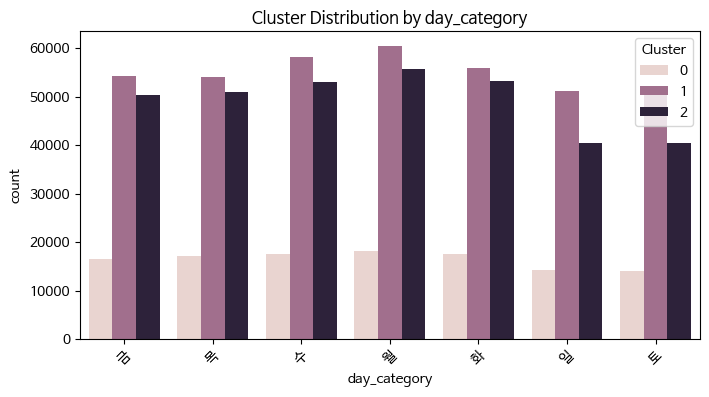

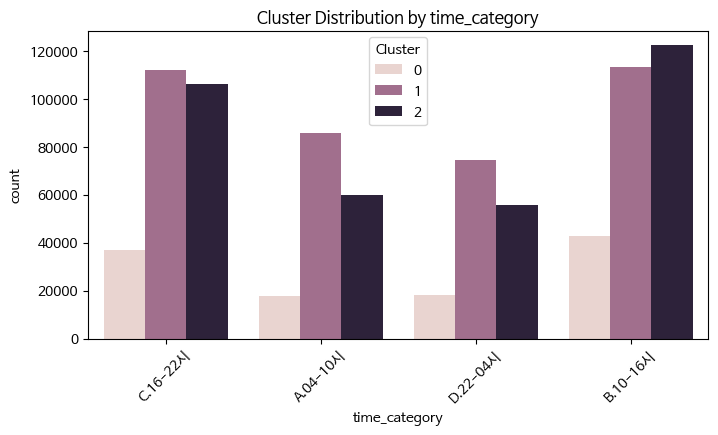

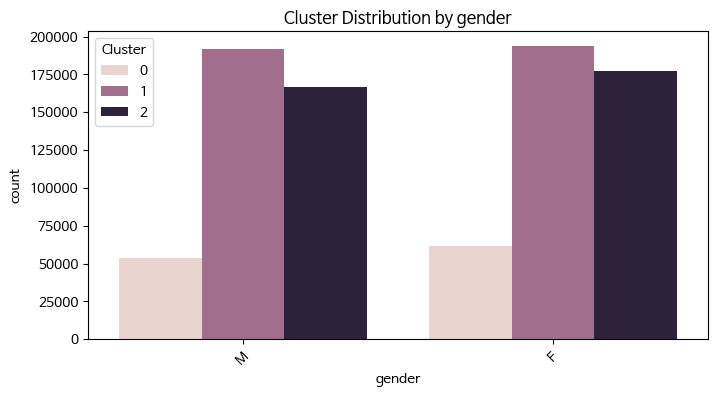

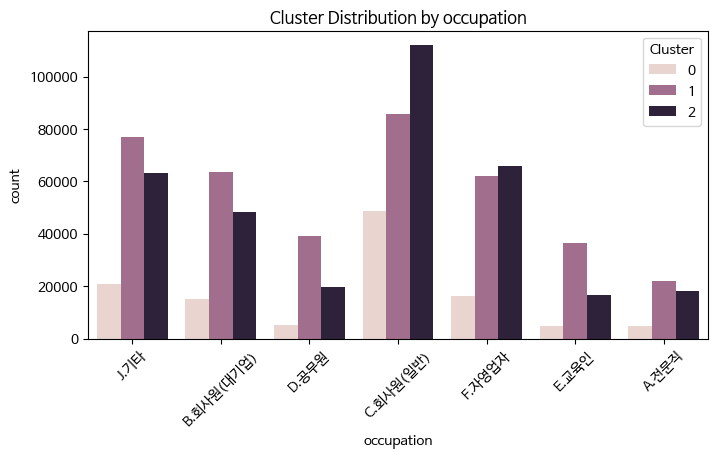

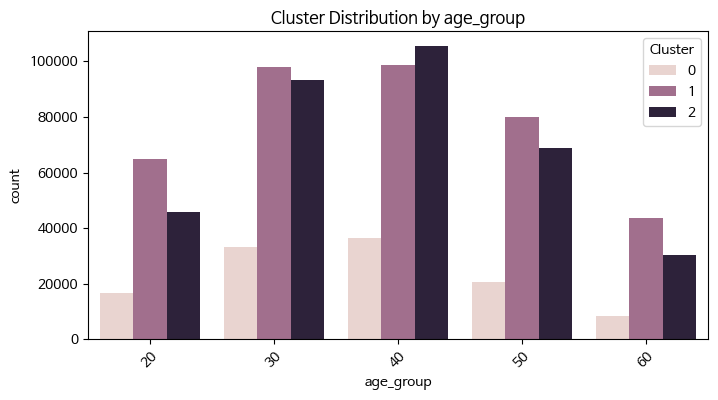

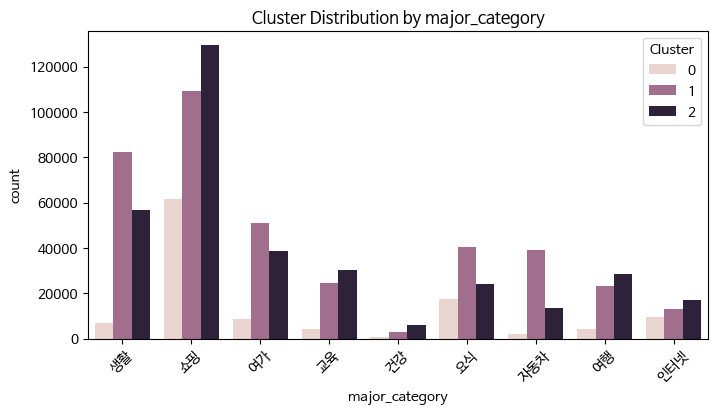

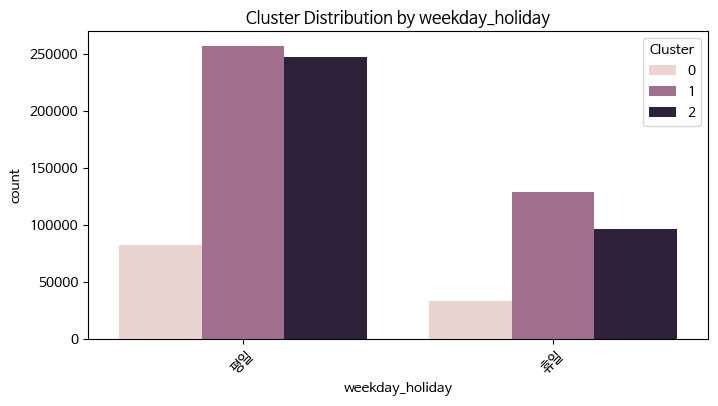

In [36]:
column_mapping = {
    '요일구분': 'day_category',
    '시간대구분': 'time_category',
    '성별': 'gender',
    '직업': 'occupation',
    '연령대': 'age_group',
    '대분류명': 'major_category',
    '평일휴일구분': 'weekday_holiday'
}

df.rename(columns=column_mapping, inplace=True)

print("Updated column names:", df.columns)

categorical_columns = [
    'day_category',
    'time_category',
    'gender',
    'occupation',
    'age_group',
    'major_category', 
    'weekday_holiday'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Cluster', data=df)
    plt.title(f'Cluster Distribution by {col}')
    plt.legend(title='Cluster')
    plt.xticks(rotation=45)
    plt.show()

# 클러스터별 액셀 파일 생성

In [17]:
for cluster in df['Cluster'].unique():
    cluster_df = df[df['Cluster'] == cluster]
    file_name = f'cluster_{cluster}.csv'
    cluster_df.to_csv(file_name, index=False)
    print(f"클러스터 {cluster}")

print("끝")

클러스터 1
클러스터 2
클러스터 0
끝


In [18]:
df2 = pd.read_csv("cluster_0.csv")

In [ ]:
df2

In [20]:
df2.describe()

,기준년월,연령대,매출건수,매출금액합,log_매출건수,log_매출금액합,Cluster
count,115603.000000,115603.000000,115603.000000,1.156030e+05,115603.000000,115603.000000,115603.0
mean,202206.638530,37.509494,2930.168456,1.336480e+08,7.045467,17.902904,0.0
std,3.421374,11.312868,7055.879740,2.702602e+08,1.161963,1.152086,0.0
min,202201.000000,20.000000,37.000000,2.925000e+06,3.637586,14.888805,0.0
25%,202204.000000,30.000000,498.000000,2.613650e+07,6.212606,17.078843,0.0
50%,202207.000000,40.000000,882.000000,5.166500e+07,6.783325,17.760291,0.0
75%,202210.000000,50.000000,2107.000000,1.161105e+08,7.653495,18.570053,0.0
max,202212.000000,60.000000,100952.000000,5.274505e+09,11.522410,22.386151,0.0


In [21]:
df3 = pd.read_csv("cluster_1.csv")

In [ ]:
df

In [23]:
df4 = pd.read_csv("cluster_2.csv")

In [ ]:
df4